In [22]:
%pip install sklearn
%pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import json

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aimar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aimar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Get all the real tags and the predictions

In [10]:
ruta_archivo = "output/predictions.jsonl"

all_tags = []
all_predictions = []

# read de jsonl file and process it
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    contenido = "[" + contenido.strip().replace("}\n{", "},{") + "]"
    elementos = json.loads(contenido)

# get the tag and prediction of each instance and concatenate them
for elemento in elementos:
    all_tags.extend(elemento.get("tags", []))
    all_predictions.extend(elemento.get("prediction", []))


In [25]:
accuracy = accuracy_score(all_tags, all_predictions)
accuracy

0.9668721109399075

In [27]:
cm=confusion_matrix(all_tags, all_predictions)
cm

array([[ 572,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,  572,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,  211,    0,    2,    0,    0,    0,    0,   13,    0,
           0,    0,    1,    0,    0],
       [   0,    0,    0, 1413,    0,    0,    0,    0,    0,    0,    0,
           1,    0,    1,    0,    0],
       [   0,    0,    6,    0,   50,    0,    0,    0,    0,    1,    0,
           0,    0,    2,    0,    0],
       [   0,    0,    0,    0,    0,  260,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    6],
       [   0,    0,    0,    0,    1,    0,  106,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,   19,    0,    0,    0,  482,    0,    0,    0,
           0,   67,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   35,    0,    0,
           0,    0,   

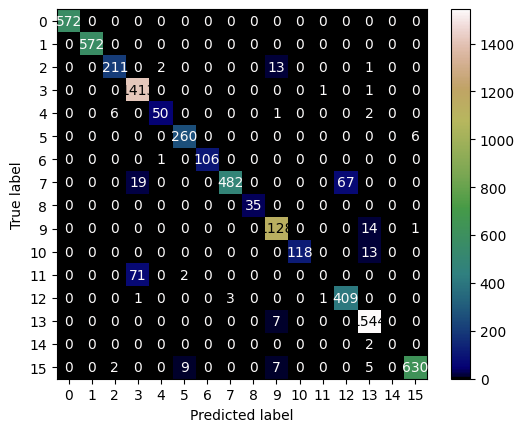

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="gist_earth")
plt.show()